# Pour le polluant PM10

### On importe les bibliothèques

In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Conversion des données en DataFrame

In [59]:

# URL de base
url = "https://data.airpl.org/api/v1/mesure/horaire/"

# Paramètres de base de la requête
base_params = {
    "code_configuration_de_mesure__code_point_de_prelevement__code_polluant": 24,
    "date_heure_tu__range": "2024-1-1,2024-3-31 23:00:00",
    "code_configuration_de_mesure__code_point_de_prelevement__code_station__code_commune__code_departement__in": "44,49,53,72,85",
    "export": "json"
}
# Limite de résultats par requête
limit = 1000
offset = 0

# DataFrame pour stocker tous les résultats
dfPM10 = pd.DataFrame()

while True:
    # Mettre à jour les paramètres avec la limite et l'offset
    params = base_params.copy()
    params.update({
        "limit": limit,
        "offset": offset
    })
    
    # Récupérer les données
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        df_results = pd.DataFrame(data['results'])  # Adapter selon la structure des données JSON
        
        # Ajouter les résultats au DataFrame principal
        dfPM10 = pd.concat([dfPM10, df_results], ignore_index=True)
        
        # Vérifier si le nombre de résultats récupérés est inférieur à la limite
        if len(df_results) < limit:
            break  # Arrêter la boucle si tous les enregistrements ont été récupérés
        
        # Mettre à jour l'offset pour la prochaine itération
        offset += limit
    else:
        print(f"Erreur {response.status_code}: {response.text}")
        break

print(f"Total records retrieved: {len(dfPM10)}")

# Sauvegarder le DataFrame pour utilisation ultérieure
dfPM10.to_pickle('PM10.pkl')

# Afficher les premières lignes du DataFrame
print(dfPM10.head())


Total records retrieved: 41770
                                  id code_polluant code_point_de_prelevement  \
0  2024-03-31 23:00:00FR23003_PM10_1            24              FR23003_PM10   
1  2024-03-31 23:00:00FR23068_PM10_4            24              FR23068_PM10   
2  2024-03-31 23:00:00FR23070_PM10_3            24              FR23070_PM10   
3  2024-03-31 23:00:00FR23078_PM10_2            24              FR23078_PM10   
4  2024-03-31 23:00:00FR23107_PM10_4            24              FR23107_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23078             SAINT EXUPERY                    Cholet   
4      FR23107            LA CHAUVINIERE                    Nantes   

  code_commune departement_code   departement_nom  code_zone_affich

In [60]:
# Charger le DataFrame depuis le fichier sauvegardé
dfPM10 = pd.read_pickle('PM10.pkl')

# Afficher les types de chaque colonne
print(dfPM10.dtypes)


id                               object
code_polluant                    object
code_point_de_prelevement        object
code_station                     object
nom_station                      object
nom_commune                      object
code_commune                     object
departement_code                 object
departement_nom                  object
code_zone_affichage               int64
date_heure_tu                    object
date_heure_local                 object
valeur_originale                float64
valeur                          float64
validite                         object
code_configuration_de_mesure     object
dtype: object


## Analyse et correction du dataset

### Types et valeurs manquantes par variable

In [61]:
dfPM10.shape

(41770, 16)

In [62]:
dfPM10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41770 entries, 0 to 41769
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            41770 non-null  object 
 1   code_polluant                 41770 non-null  object 
 2   code_point_de_prelevement     41770 non-null  object 
 3   code_station                  41770 non-null  object 
 4   nom_station                   41770 non-null  object 
 5   nom_commune                   41770 non-null  object 
 6   code_commune                  41770 non-null  object 
 7   departement_code              41770 non-null  object 
 8   departement_nom               41770 non-null  object 
 9   code_zone_affichage           41770 non-null  int64  
 10  date_heure_tu                 41770 non-null  object 
 11  date_heure_local              41770 non-null  object 
 12  valeur_originale              40781 non-null  float64
 13  v

In [63]:
dfPM10.isnull().sum()

id                                0
code_polluant                     0
code_point_de_prelevement         0
code_station                      0
nom_station                       0
nom_commune                       0
code_commune                      0
departement_code                  0
departement_nom                   0
code_zone_affichage               0
date_heure_tu                     0
date_heure_local                  0
valeur_originale                989
valeur                          996
validite                          7
code_configuration_de_mesure      0
dtype: int64

Observations : 
- On remarque que pour les colonnes "valeur_originale" et "valeur" et validite on a quelques lignes vides, mais aucune colonne entièrement vide

## Visualiser les différentes données de chaque colonne

In [64]:
for col in dfPM10.select_dtypes('float64'):
    print(f'{col :-<20} {dfPM10[col].unique()}')

valeur_originale---- [ 7.925     4.65      9.25     ... 32.100002 29.349998 51.150002]
valeur-------------- [7.90e+00 4.70e+00 9.30e+00      nan 8.80e+00 8.70e+00 6.70e+00 6.20e+00
 7.30e+00 8.90e+00 8.50e+00 7.40e+00 7.10e+00 1.00e+01 1.50e+01 9.50e+00
 1.40e+01 1.10e+01 7.50e+00 6.60e+00 9.60e+00 6.30e+00 4.80e+00 9.40e+00
 1.20e+01 8.30e+00 7.20e+00 1.30e+01 8.60e+00 9.80e+00 1.90e+00 5.00e+00
 8.00e+00 7.00e+00 5.90e+00 4.30e-01 9.20e+00 5.40e+00 6.90e+00 5.60e+00
 4.40e+00 9.10e+00 5.30e+00 4.30e+00 6.40e+00 6.10e+00 3.50e+00 5.70e+00
 5.10e+00 2.70e+00 3.70e+00 3.60e+00 4.00e+00 4.60e+00 3.00e+00 6.80e+00
 3.40e+00 3.30e+00 3.20e+00 3.80e+00 2.60e+00 3.10e+00 5.50e+00 2.90e+00
 2.50e+00 3.90e+00 2.10e+00 2.80e+00 5.20e+00 8.20e+00 1.70e+00 4.20e+00
 4.10e+00 2.40e+00 1.80e+00 7.80e+00 8.40e+00 2.00e+00 4.50e+00 2.40e+01
 6.00e+00 7.60e+00 8.10e+00 5.80e+00 4.90e+00 7.70e+00 6.50e+00 0.00e+00
 2.20e+00 2.30e+00 9.00e+00 3.80e-01 1.60e+00 9.30e-01 1.30e+00 1.50e+00
 5.30e-01 1.60e+

In [67]:
for col in dfPM10.select_dtypes('int64'):
    print(f'{col :-<20} {dfPM10[col].unique()}')

code_zone_affichage- [ 3  4  1  2  5  6 13  7 11  8]


In [68]:
for col in dfPM10.select_dtypes('object'):
    print(f'{col :-<20} {dfPM10[col].unique()}')

id------------------ ['2024-03-31 23:00:00FR23003_PM10_1' '2024-03-31 23:00:00FR23068_PM10_4'
 '2024-03-31 23:00:00FR23070_PM10_3' ...
 '2024-01-01 00:00:00FR23242_PM10_1' '2024-01-01 00:00:00FR23249_PM10_1'
 '2024-01-01 00:00:00FR23251_PM10_1']
code_polluant------- ['24']
code_point_de_prelevement ['FR23003_PM10' 'FR23068_PM10' 'FR23070_PM10' 'FR23078_PM10'
 'FR23107_PM10' 'FR23110_PM10' 'FR23120_PM10' 'FR23123_PM10'
 'FR23124_PM10' 'FR23152_PM10' 'FR23177_PM10' 'FR23178_PM10'
 'FR23182_PM10' 'FR23188_PM10' 'FR23238_PM10' 'FR23239_PM10'
 'FR23242_PM10' 'FR23249_PM10' 'FR23251_PM10']
code_station-------- ['FR23003' 'FR23068' 'FR23070' 'FR23078' 'FR23107' 'FR23110' 'FR23120'
 'FR23123' 'FR23124' 'FR23152' 'FR23177' 'FR23178' 'FR23182' 'FR23188'
 'FR23238' 'FR23239' 'FR23242' 'FR23249' 'FR23251']
nom_station--------- ['LA MEGRETAIS' 'FROSSAY' 'SAINT ETIENNE DE MONTLUC' 'SAINT EXUPERY'
 'LA CHAUVINIERE' 'LEON BLUM' 'BEAUX ARTS' 'MAZAGRAN' 'LA TARDIERE'
 'DELACROIX' "SAINT DENIS D'ANJOU" '

Observations : 
- on remarque que pour les colonnes de type float64, pour les colonnes "valeur_originale" et "valeur", des valeurs ne sont pas correctes car il y à une présence de "nan" et "-999.".
- Nous allons donc supprimer les lignes ou ces dernières sont présentes, et donc supprimer toutes les valeurs qui seront négatives pour englober.

Certaines colonnes ne semblent pas être du bon types, il faut donc les changer : 
- code_polluant : object --> int64
- code_commune : object --> int64
- departement_code : object --> int64

### Supression des valeurs "nan" et "-999" pour les colonnes "valeur_originale" et "valeur"

In [69]:
# Supprimer les lignes comportant des valeurs "NaN" dans les colonnes "valeur" et "valeur_originale"
dfPM10.dropna(subset=['valeur', 'valeur_originale'], inplace=True)
    
# Supprimer les lignes comportant des valeurs négatives dans les colonnes "valeur" et "valeur_originale"
dfPM10 = dfPM10[(dfPM10['valeur'] >= 0) & (dfPM10['valeur_originale'] >= 0)]

In [70]:
for col in dfPM10.select_dtypes('float64'):
    print(f'{col :-<20} {dfPM10[col].unique()}')

valeur_originale---- [ 7.925     4.65      9.25     ... 32.100002 29.349998 51.150002]
valeur-------------- [7.90e+00 4.70e+00 9.30e+00 8.80e+00 8.70e+00 6.70e+00 6.20e+00 7.30e+00
 8.90e+00 8.50e+00 7.40e+00 7.10e+00 1.00e+01 1.50e+01 9.50e+00 1.40e+01
 1.10e+01 7.50e+00 6.60e+00 9.60e+00 6.30e+00 4.80e+00 9.40e+00 1.20e+01
 8.30e+00 7.20e+00 1.30e+01 8.60e+00 9.80e+00 1.90e+00 5.00e+00 8.00e+00
 7.00e+00 5.90e+00 4.30e-01 9.20e+00 5.40e+00 6.90e+00 5.60e+00 4.40e+00
 9.10e+00 5.30e+00 4.30e+00 6.40e+00 6.10e+00 3.50e+00 5.70e+00 5.10e+00
 2.70e+00 3.70e+00 3.60e+00 4.00e+00 4.60e+00 3.00e+00 6.80e+00 3.40e+00
 3.30e+00 3.20e+00 3.80e+00 2.60e+00 3.10e+00 5.50e+00 2.90e+00 2.50e+00
 3.90e+00 2.10e+00 2.80e+00 5.20e+00 8.20e+00 1.70e+00 4.20e+00 4.10e+00
 2.40e+00 1.80e+00 7.80e+00 8.40e+00 2.00e+00 4.50e+00 2.40e+01 6.00e+00
 7.60e+00 8.10e+00 5.80e+00 4.90e+00 7.70e+00 6.50e+00 0.00e+00 2.20e+00
 2.30e+00 9.00e+00 3.80e-01 1.60e+00 9.30e-01 1.30e+00 1.50e+00 5.30e-01
 1.60e+01 1.80e+

### Changement de type pour les colonnes : 
- code_polluant : object --> int64
- code_commune : object --> int64
- departement_code : object --> int64

In [71]:
# Vérifier si les colonnes existent dans le DataFrame
colonnes_a_convertir = ['code_commune', 'departement_code', 'code_polluant']

# Convertir les colonnes en int64
for col in colonnes_a_convertir:
    if col in dfPM10.columns:
        dfPM10[col] = dfPM10[col].astype('int64')

# Afficher les types de colonnes pour vérifier les conversions
print(dfPM10.dtypes)


id                               object
code_polluant                     int64
code_point_de_prelevement        object
code_station                     object
nom_station                      object
nom_commune                      object
code_commune                      int64
departement_code                  int64
departement_nom                  object
code_zone_affichage               int64
date_heure_tu                    object
date_heure_local                 object
valeur_originale                float64
valeur                          float64
validite                         object
code_configuration_de_mesure     object
dtype: object


## Comparaison avec les valeurs de seuils

Nous faisons le choix dans un premier temps de ne traiter que les données mensuelles, en prenant en granularité les données mensuelles, de manière à comparer les trimestres des différentes années

In [72]:
# Définition des seuils pour les particules PM10 en µg/m3
OBJECTIF_QUALITE_PM10 = 30  # en moyenne annuelle
VALEUR_LIMITE_ANNUELLE_PM10 = 40  # en moyenne annuelle

# Afficher les seuils définis
print(f"Objectif de qualité PM10 : {OBJECTIF_QUALITE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Valeur limite annuelle PM10 : {VALEUR_LIMITE_ANNUELLE_PM10} µg/m3 (en moyenne annuelle)")


Objectif de qualité PM10 : 30 µg/m3 (en moyenne annuelle)
Valeur limite annuelle PM10 : 40 µg/m3 (en moyenne annuelle)


Création d'une variable cible qui vaut 1 si la valeur est supérieure au seuil et 0 sinon
On ajoute ces colonnes au dataframe

In [73]:
# Convertir les colonnes de date en format datetime
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Ajouter des colonnes de comparaison avec les seuils (variable cible)
dfPM10['cible_objectif_qualite_PM10'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10).astype(int)
dfPM10['cible_valeur_limite_annuelle_PM10'] = (dfPM10['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10).astype(int)

# Afficher les premières lignes du DataFrame avec les nouvelles colonnes de comparaison
print(dfPM10.head())

# Sauvegarder le DataFrame avec les nouvelles colonnes de comparaison
dfPM10.to_pickle('PM10_with_comparison.pkl')


                                  id  code_polluant code_point_de_prelevement  \
0  2024-03-31 23:00:00FR23003_PM10_1             24              FR23003_PM10   
1  2024-03-31 23:00:00FR23068_PM10_4             24              FR23068_PM10   
2  2024-03-31 23:00:00FR23070_PM10_3             24              FR23070_PM10   
4  2024-03-31 23:00:00FR23107_PM10_4             24              FR23107_PM10   
5  2024-03-31 23:00:00FR23110_PM10_3             24              FR23110_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
4      FR23107            LA CHAUVINIERE                    Nantes   
5      FR23110                 LEON BLUM             Saint-Nazaire   

   code_commune  departement_code   departement_nom  code_zone_affichage  \
0         44052 

### Distribution des variables cibles : 

In [74]:
# Afficher le nombre de valeurs 0 et 1 dans la colonne 'cible_objectif_qualite_PM10'
print(dfPM10['cible_objectif_qualite_PM10'].value_counts())
print(dfPM10['cible_valeur_limite_annuelle_PM10'].value_counts())


cible_objectif_qualite_PM10
0    38108
1     2666
Name: count, dtype: int64
cible_valeur_limite_annuelle_PM10
0    39943
1      831
Name: count, dtype: int64


Observations : on remarque ici qu'aucune valeur ne dépasse le seuil, nous avons donc fait le choix de modifier ce dernier de manière arbitraire pour rendre l'exercice plus intéressant, toutes les valeurs seront donc divisées par 2
De plus pour visualiser les résultats par mois, on décide de créer une valeur de seuil mensuelle nommé "OBJECTIF_QUALITE_PM10_MENSUEL" et qui aura pour valeur 35 (car la moyenne annuelle étant à 30 et la valeur limite annuelle étant à 40 on prend l'entre deux) qu'on va venir diviser par 2 pour avoir des résultats, on va prendre 18 pour arrondir à la valeur au-dessus

In [75]:
# Définition des nouveaux seuils pour les particules PM10 en µg/m3
OBJECTIF_QUALITE_PM10 = 15  # en moyenne annuelle
VALEUR_LIMITE_ANNUELLE_PM10 = 20  # en moyenne annuelle
OBJECTIF_QUALITE_PM10_MENSUEL = 18 #en moyenne mensuelle

# Afficher les nouveaux seuils définis
print(f"Objectif de qualité PM10 : {OBJECTIF_QUALITE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Valeur limite annuelle PM10 : {VALEUR_LIMITE_ANNUELLE_PM10} µg/m3 (en moyenne annuelle)")
print(f"Objectif de qualité PM10 mensuelle : {OBJECTIF_QUALITE_PM10_MENSUEL} µg/m3 (en moyenne mensuelle)")

Objectif de qualité PM10 : 15 µg/m3 (en moyenne annuelle)
Valeur limite annuelle PM10 : 20 µg/m3 (en moyenne annuelle)
Objectif de qualité PM10 mensuelle : 18 µg/m3 (en moyenne mensuelle)


In [76]:
# Convertir les colonnes de date en format datetime
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Ajouter des colonnes de comparaison avec les seuils (variable cible)
dfPM10['cible_objectif_qualite_PM10'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10).astype(int)
dfPM10['cible_valeur_limite_annuelle_PM10'] = (dfPM10['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10).astype(int)
dfPM10['cible_objectif_qualite_PM10_mensuelle'] = (dfPM10['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL).astype(int)

# Afficher les premières lignes du DataFrame avec les nouvelles colonnes de comparaison
print(dfPM10.head())

# Sauvegarder le DataFrame avec les nouvelles colonnes de comparaison
dfPM10.to_pickle('PM10_with_comparison.pkl')

                                  id  code_polluant code_point_de_prelevement  \
0  2024-03-31 23:00:00FR23003_PM10_1             24              FR23003_PM10   
1  2024-03-31 23:00:00FR23068_PM10_4             24              FR23068_PM10   
2  2024-03-31 23:00:00FR23070_PM10_3             24              FR23070_PM10   
4  2024-03-31 23:00:00FR23107_PM10_4             24              FR23107_PM10   
5  2024-03-31 23:00:00FR23110_PM10_3             24              FR23110_PM10   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
4      FR23107            LA CHAUVINIERE                    Nantes   
5      FR23110                 LEON BLUM             Saint-Nazaire   

   code_commune  departement_code   departement_nom  code_zone_affichage  \
0         44052 

In [77]:
# Afficher le nombre de valeurs 0 et 1 dans la colonne 'cible_objectif_qualite_PM10'
print(dfPM10['cible_objectif_qualite_PM10'].value_counts())
print(dfPM10['cible_valeur_limite_annuelle_PM10'].value_counts())
print(dfPM10['cible_objectif_qualite_PM10_mensuelle'].value_counts())


cible_objectif_qualite_PM10
0    27350
1    13424
Name: count, dtype: int64
cible_valeur_limite_annuelle_PM10
0    32695
1     8079
Name: count, dtype: int64
cible_objectif_qualite_PM10_mensuelle
0    30917
1     9857
Name: count, dtype: int64


Observations : 
- Les variables cible_objectif_qualite_PM10 et cible_objectif_qualite_PM10_mensuelle sont plutot équilibrés, il y à donc un problème sur l'objectif qualité PM10, avec beaucoup d'alertes
- La variable cible_valeur_limite_annuelle_PM10 est plutot déséquilibré, l'indice semble donc plutôt correcte.

## Visualisation des données par des graphiques

Graphique pour voir par année, quand est-ce qu'on à dépassé le seuil de cible_objectif_qualité_PM10 (valeur de seuil = 15, en rouge quand depassé)

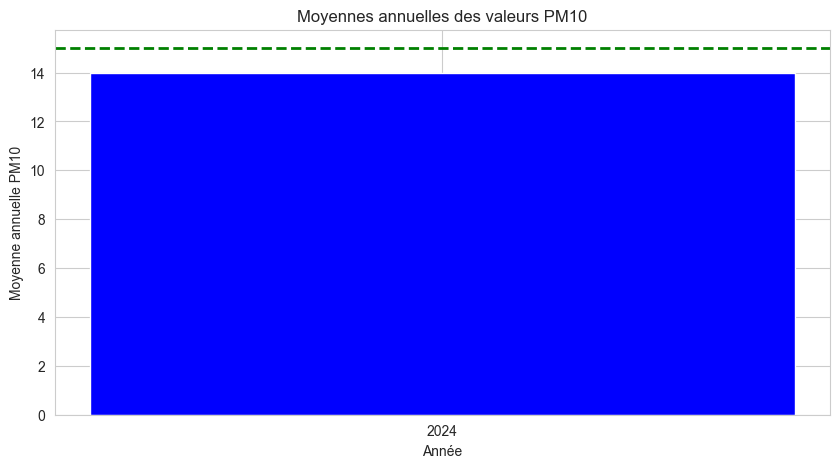

In [78]:
# Grouper les données par année
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
annual_means = dfPM10.groupby('année')['valeur'].mean().reset_index()

# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means['depasse_seuil'] = (annual_means['valeur'] > OBJECTIF_QUALITE_PM10).astype(int)

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means['depasse_seuil']]
plt.bar(annual_means['année'], annual_means['valeur'], color=colors)
plt.axhline(y=OBJECTIF_QUALITE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle PM10')
plt.title('Moyennes annuelles des valeurs PM10')
plt.xticks(annual_means['année'])
plt.show()


Graphique pour voir par année, quand est-ce qu'on à dépassé le seuil de la valeur limite annuelle (valeur de seuil = 20, en rouge quand depassé)

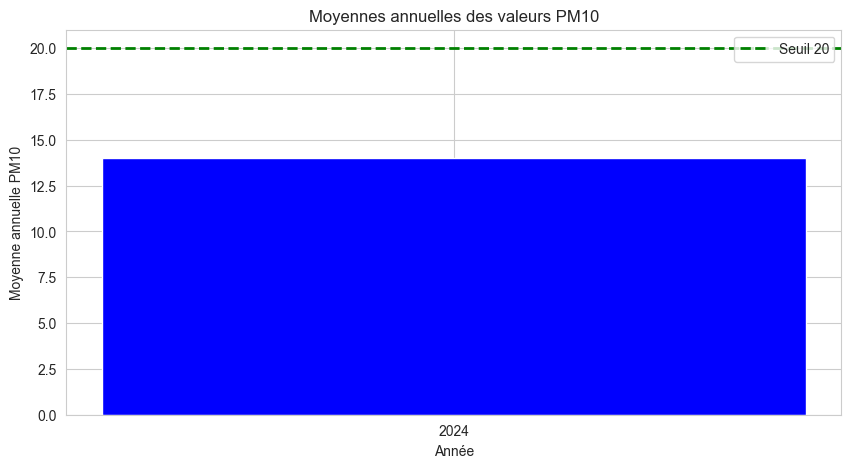

In [79]:
# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means['depasse_seuil'] = (annual_means['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10).astype(int)

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means['depasse_seuil']]
plt.bar(annual_means['année'], annual_means['valeur'], color=colors)
plt.axhline(y=VALEUR_LIMITE_ANNUELLE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil {VALEUR_LIMITE_ANNUELLE_PM10}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle PM10')
plt.title('Moyennes annuelles des valeurs PM10')
plt.xticks(annual_means['année'])
plt.legend()
plt.show()


#### Fusion des 2 graphiques, si un des seuils est dépassé, la colonne devient rouge

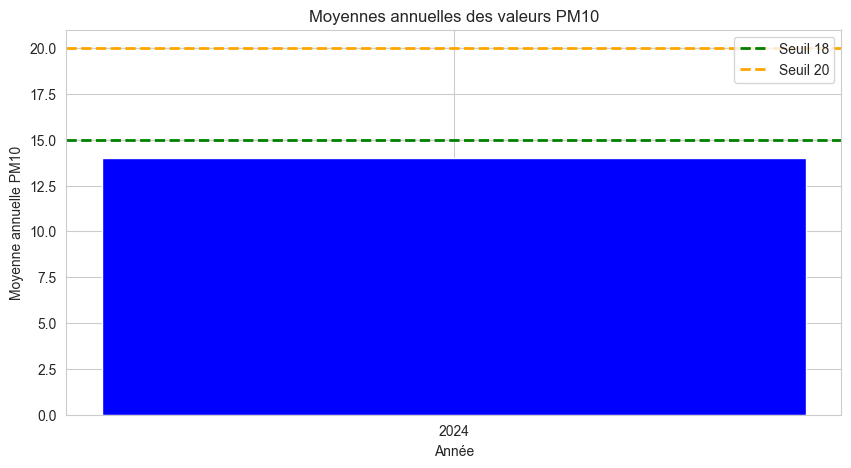

In [80]:
# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means['depasse_seuil'] = ((annual_means['valeur'] > OBJECTIF_QUALITE_PM10).astype(int) |
                                (annual_means['valeur'] > OBJECTIF_QUALITE_PM10).astype(int))

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means['depasse_seuil']]
plt.bar(annual_means['année'], annual_means['valeur'], color=colors)
plt.axhline(y=OBJECTIF_QUALITE_PM10, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
plt.axhline(y=VALEUR_LIMITE_ANNUELLE_PM10, color='orange', linestyle='--', linewidth=2, label=f'Seuil {VALEUR_LIMITE_ANNUELLE_PM10}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle PM10')
plt.title('Moyennes annuelles des valeurs PM10')
plt.xticks(annual_means['année'])
plt.legend()
plt.show()

Graphique pour voir par année et par mois, quand est-ce qu'on à dépassé le seuil de cible_objectif_qualité_PM10_mensuel (valeur de seuil = 18, en rouge quand depassé)

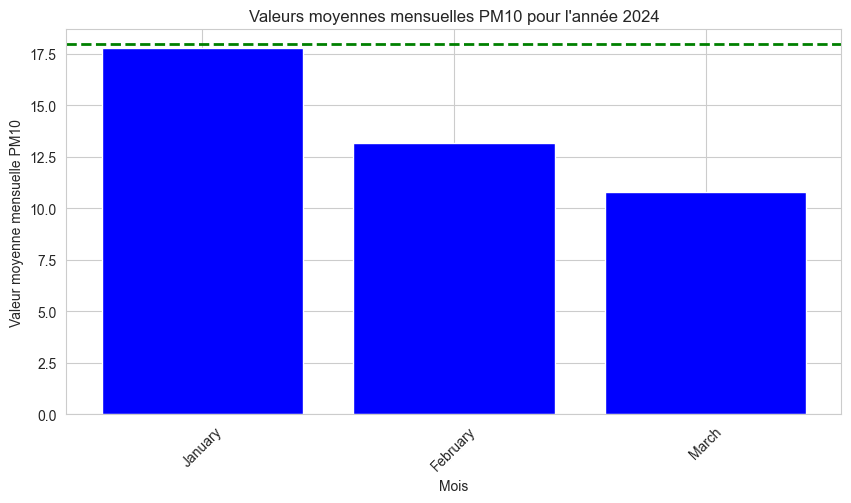

In [81]:
import calendar

# Grouper les données par année et mois
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
dfPM10['mois'] = dfPM10['date_heure_tu'].dt.month
grouped = dfPM10.groupby(['année', 'mois'])[['valeur']].mean().reset_index()

# Créer la colonne indiquant si la moyenne mensuelle dépasse le seuil
grouped['depasse_seuil'] = (grouped['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL).astype(int)

# Créer le diagramme en bâtons pour chaque année
for year in grouped['année'].unique():
    plt.figure(figsize=(10, 5))
    subset = grouped[grouped['année'] == year]
    colors = ['red' if x == 1 else 'blue' for x in subset['depasse_seuil']]
    months = [calendar.month_name[m] for m in subset['mois']]
    plt.bar(months, subset['valeur'], color=colors)
    plt.axhline(y=OBJECTIF_QUALITE_PM10_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_PM10_MENSUEL}')
    plt.xlabel('Mois')
    plt.ylabel('Valeur moyenne mensuelle PM10')
    plt.title(f'Valeurs moyennes mensuelles PM10 pour l\'année {year}')
    plt.xticks(rotation=45)
    plt.show()


## Ajout d'alerte quand les variables de seuils sont dépassées

### Pour les valeurs de seuils annuels

In [82]:
# Convertir les colonnes de date en format datetime si ce n'est pas déjà fait
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Grouper les données par année
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
grouped = dfPM10.groupby('année')[['valeur']].mean().reset_index()

# Arrondir les valeurs moyennes à un chiffre après la virgule
grouped['valeur'] = grouped['valeur'].round(1)

# Créer la colonne indiquant si la moyenne annuelle dépasse un des seuils
grouped['depasse_objectif_qualite'] = grouped['valeur'] > OBJECTIF_QUALITE_PM10
grouped['depasse_valeur_limite'] = grouped['valeur'] > VALEUR_LIMITE_ANNUELLE_PM10

# Regrouper les alertes par type
alertes_qualite = grouped[grouped['depasse_objectif_qualite']]
alertes_limite = grouped[grouped['depasse_valeur_limite']]

# Afficher les alertes par type pour les moyennes annuelles
if not alertes_qualite.empty:
    print("Alertes pour l'Objectif de Qualité annuel:")
    for index, row in alertes_qualite.iterrows():
        print(f"Alerte: Valeur moyenne annuelle {row['valeur']} dépasse l'Objectif de Qualité annuel ({OBJECTIF_QUALITE_PM10} µg/m3) en {row['année']}")
else:
    print("Aucune alerte pour l'Objectif de Qualité annuel.")

if not alertes_limite.empty:
    print("\nAlertes pour la Valeur Limite annuelle:")
    for index, row in alertes_limite.iterrows():
        print(f"Alerte: Valeur moyenne annuelle {row['valeur']} dépasse la Valeur Limite annuelle ({VALEUR_LIMITE_ANNUELLE_PM10} µg/m3) en {row['année']}")
else:
    print("Aucune alerte pour la Valeur Limite annuelle.")


Aucune alerte pour l'Objectif de Qualité annuel.
Aucune alerte pour la Valeur Limite annuelle.


### Pour les valeurs de seuils mensuels

In [83]:
# Convertir les colonnes de date en format datetime si ce n'est pas déjà fait
dfPM10['date_heure_tu'] = pd.to_datetime(dfPM10['date_heure_tu'])

# Grouper les données par année et mois
dfPM10['année'] = dfPM10['date_heure_tu'].dt.year
dfPM10['mois'] = dfPM10['date_heure_tu'].dt.month
grouped = dfPM10.groupby(['année', 'mois'])[['valeur']].mean().reset_index()

# Arrondir les valeurs moyennes à un chiffre après la virgule
grouped['valeur'] = grouped['valeur'].round(1)

# Créer la colonne indiquant si la moyenne mensuelle dépasse le seuil
grouped['depasse_objectif_qualite'] = grouped['valeur'] > OBJECTIF_QUALITE_PM10_MENSUEL

# Extraire les mois en lettres
grouped['mois_lettres'] = grouped['mois'].apply(lambda x: calendar.month_name[x])

# Regrouper les alertes par type
alertes_qualite = grouped[grouped['depasse_objectif_qualite']]

# Afficher les alertes par type pour les moyennes mensuelles
if not alertes_qualite.empty:
    print("Alertes pour l'Objectif de Qualité mensuel:")
    for index, row in alertes_qualite.iterrows():
        print(f"Alerte: Valeur moyenne {row['valeur']} dépasse l'Objectif de Qualité mensuel ({OBJECTIF_QUALITE_PM10_MENSUEL} µg/m3) en {row['mois_lettres']} {row['année']}")
else:
    print("Aucune alerte pour l'Objectif de Qualité mensuel.")


Aucune alerte pour l'Objectif de Qualité mensuel.
